# (1) 이산형 확률분포

In [ ]:
# 필요한 package 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

%matplotlib inline

### (1-1) 베르누이 분포 (Bernoulli Distribution)

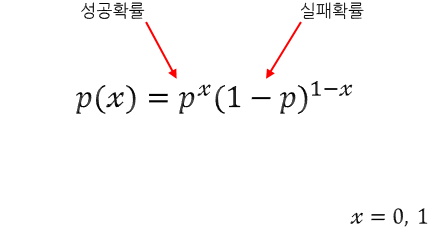

In [ ]:
# p 인수로 분포의 모수를 설정하고, 베르누이 확률 분포를 정의

theta = 0.6  # theta = p
rv = sp.stats.bernoulli(theta)

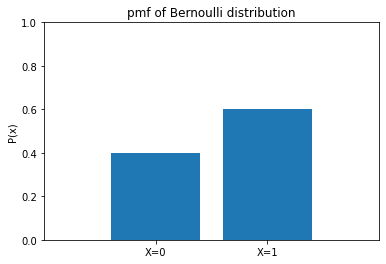

In [ ]:
# pmf method를 통해 확률 질량 함수(pmf; probability mass function) 정의
# 확률 질량 함수 그래프 그리기

xx = [0, 1]
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["X=0", "X=1"])
plt.ylabel("P(x)")
plt.title("pmf of Bernoulli distribution")
plt.show()

In [ ]:
# rvs method를 통해 베르누이 시행 반복

x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


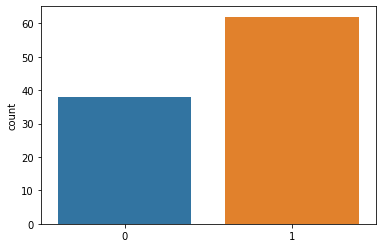

In [ ]:
# 베르누이 시행 결과 시각화

sns.countplot(x)
plt.show()

> pmf와 cdf 차이

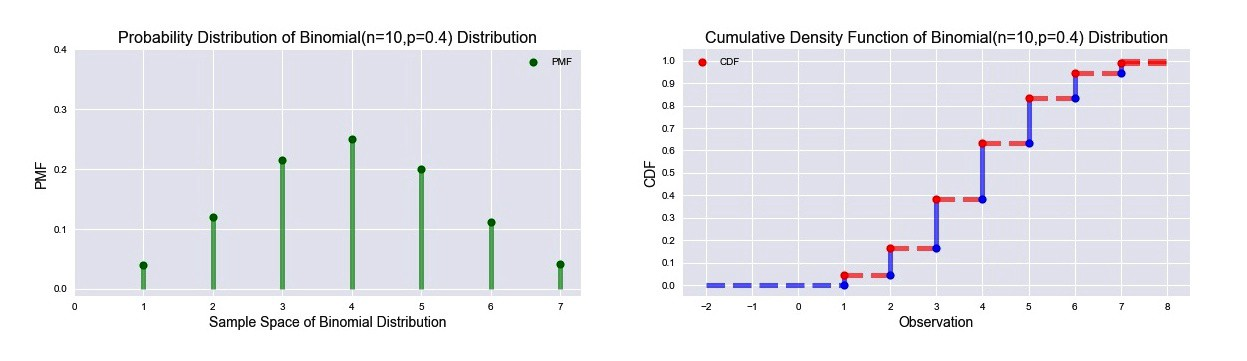

In [ ]:
# 베르누이 시행 결과, 각 구분에 대한 pmf 값 확인

rv.pmf([0, 1])

array([0.4, 0.6])

In [ ]:
# 베르누이 시행 결과, 각 구분에 대한 cdf (cumulative density function) 값 확인

rv.cdf([0, 1])

array([0.4, 1. ])

In [ ]:
# 이론적인 확률 분포와 샘플(표본)의 확률 분포를 동시에 표현하기 위함
# 값이 0인 데이터 수와 값이 1인 데이터 수를 count 하고 dataframe 형태로 저장

y = np.bincount(x, minlength=2)/float(len(x))
df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.pivot("value", "type", "ratio")

type,simulation,theoretic
value,,
0,0.38,0.4
1,0.62,0.6


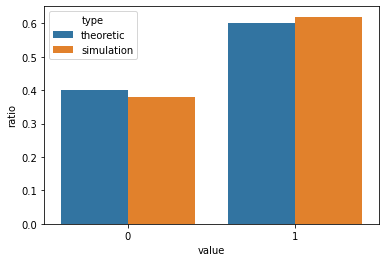

In [ ]:
# 이론적인 확률 분포와 샘플(표본)의 확률 분포를 동시에 그래프로 시각화

sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

> 베르누이 분포의 기댓값 & 분산 수식

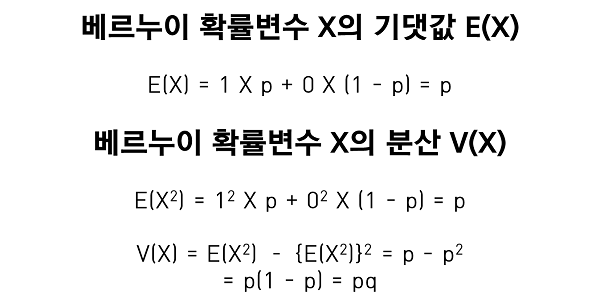

In [ ]:
np.mean(x) # 기댓값

0.62

In [ ]:
np.var(x, ddof=1) # 분산

0.23797979797979804

In [ ]:
# describe 함수를 통해 기댓값, 분산 연산을 한번에 수행 가능

s = sp.stats.describe(x)

In [ ]:
# Pandas package의 series 객체로 변경해 describe method 사용하면, 다양한 통계량 확인 가능

pd.Series(x).describe()

count    100.000000
mean       0.620000
std        0.487832
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

### (1-2) 이항 분포 (Binomial Distribution)

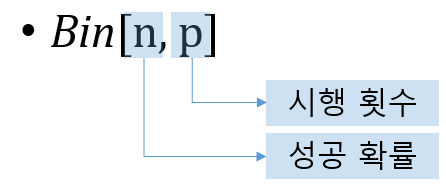

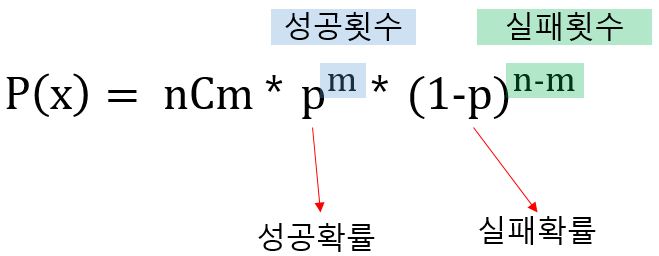

In [ ]:
# n, p 인수로 분포의 모수를 설정하고, 이항 분포를 정의

N = 10
theta = 0.6  # theta = p
rv = sp.stats.binom(N, theta)

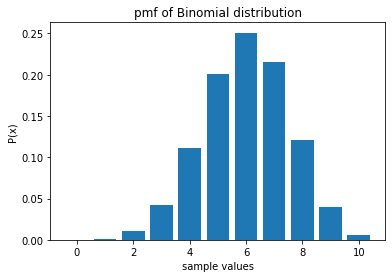

In [ ]:
# pmf method를 통해 확률 질량 함수(pmf; probability mass function) 정의
# N번 시행 중, m (np.arange(N+1)) 만큼 성공할 확률 구하기
# 확률 질량 함수 그래프 그리기

xx = np.arange(N + 1)  # xx = m
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("sample values")
plt.ylabel("P(x)")
plt.title("pmf of Binomial distribution")
plt.show()

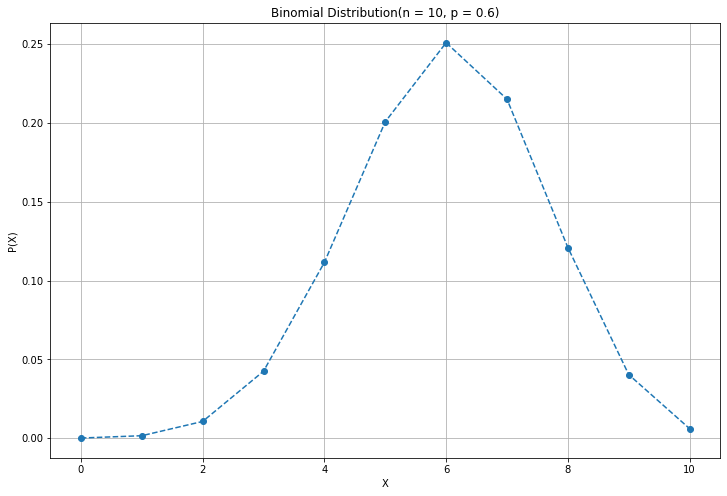

In [ ]:
# 확률 질량 함수 그래프 그리기

plt.figure(figsize=(12, 8))
plt.plot(xx, rv.pmf(xx), 'o--')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Binomial Distribution(n = 10, p = 0.6)')
plt.grid()
plt.show()

In [ ]:
# 이항분포 시행 결과, 각 구분에 대한 pmf 값 확인
# 상기 그래프의 index: 6과 동일한 결과 산출

sp.stats.binom.pmf(k=6, n=10, p=0.6)

0.2508226560000002

In [ ]:
# 이항분포 시행 결과, 각 구분에 대한 cdf (cumulative density function) 값 확인

sp.stats.binom.cdf(k=6, n=10, p=0.6)

0.6177193983999999

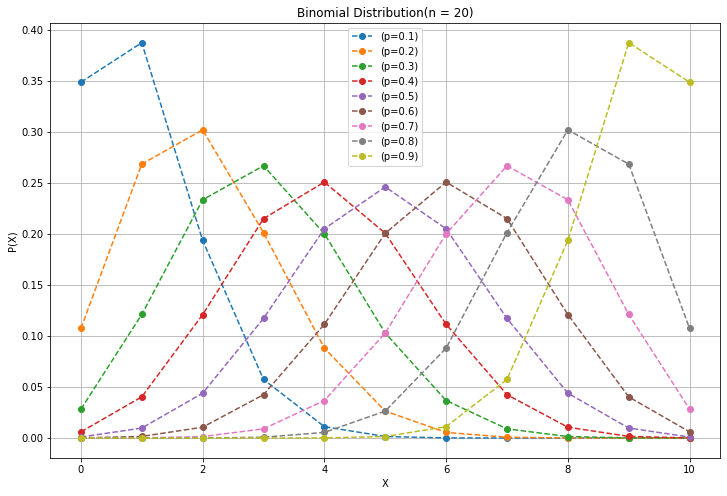

In [ ]:
# 확률 질량 함수 그래프 그리기
# 확률 p 값 변경해가며, 차이 확인 가능

plt.figure(figsize=(12, 8))

for p in np.arange(1, 10) / 10:
    plt.plot(xx, sp.stats.binom(N, p).pmf(xx), 'o--', label='(p=' + str(p) + ')')
    
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Binomial Distribution(n = 20)')
plt.grid()
plt.legend()
plt.show()

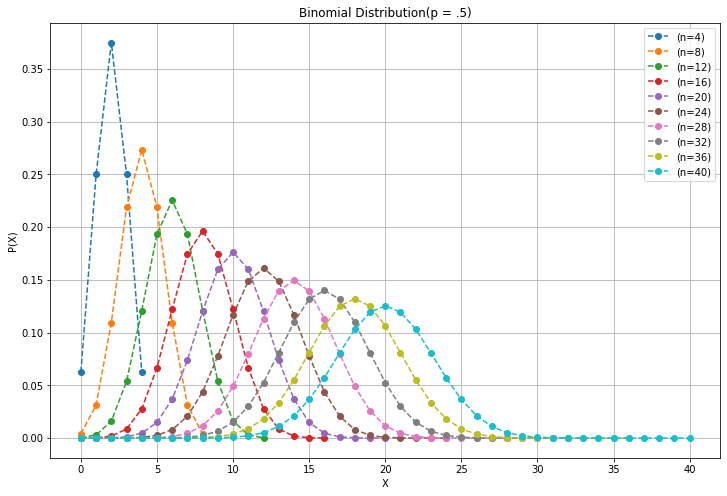

In [ ]:
# 확률 질량 함수 그래프 그리기
# 확률 p 값은 고정하고 n 사이즈를 변경해가며, 차이 확인 가능

p = .5

plt.figure(figsize=(12, 8))

for n in np.arange(4, 41, 4):
    x = np.arange(n + 1)
    plt.plot(x, sp.stats.binom(n, p).pmf(x), 'o--', label='(n=' + str(n) + ')')
    
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Binomial Distribution(p = .5)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# rvs method를 통해 베르누이 시행 반복

x = rv.rvs(100, random_state=0)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

> 이항분포의 기댓값 & 분산 수식

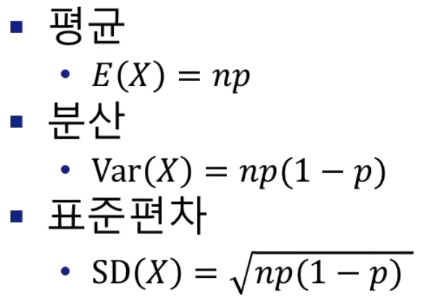

In [ ]:
np.mean(x) # 기댓값

6.18

In [ ]:
np.var(x, ddof=1) # 분산

2.4117171717171715

### (1-3) 포아송분포 (Poisson Distribution)

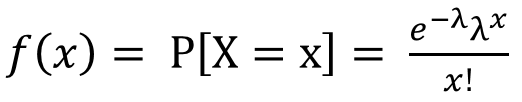

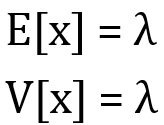

In [ ]:
# lambda 인수로 분포의 모수를 설정하고, 이항 분포를 정의

x = np.arange(41, dtype='f8')   # 큰 숫자를 취급하기 위하여 데이터 타입을 실수로 선언
l = 20  # I = lambda
y = (np.power(l, x) * np.exp(-l)) / sp.special.factorial(x)
y

array([2.06115362e-09, 4.12230724e-08, 4.12230724e-07, 2.74820483e-06,
       1.37410241e-05, 5.49640966e-05, 1.83213655e-04, 5.23467587e-04,
       1.30866897e-03, 2.90815326e-03, 5.81630652e-03, 1.05751028e-02,
       1.76251713e-02, 2.71156481e-02, 3.87366401e-02, 5.16488535e-02,
       6.45610669e-02, 7.59541964e-02, 8.43935515e-02, 8.88353174e-02,
       8.88353174e-02, 8.46050642e-02, 7.69136947e-02, 6.68814737e-02,
       5.57345614e-02, 4.45876491e-02, 3.42981916e-02, 2.54060679e-02,
       1.81471913e-02, 1.25153044e-02, 8.34353625e-03, 5.38292661e-03,
       3.36432913e-03, 2.03898735e-03, 1.19940432e-03, 6.85373900e-04,
       3.80763278e-04, 2.05817988e-04, 1.08325257e-04, 5.55514138e-05,
       2.77757069e-05])

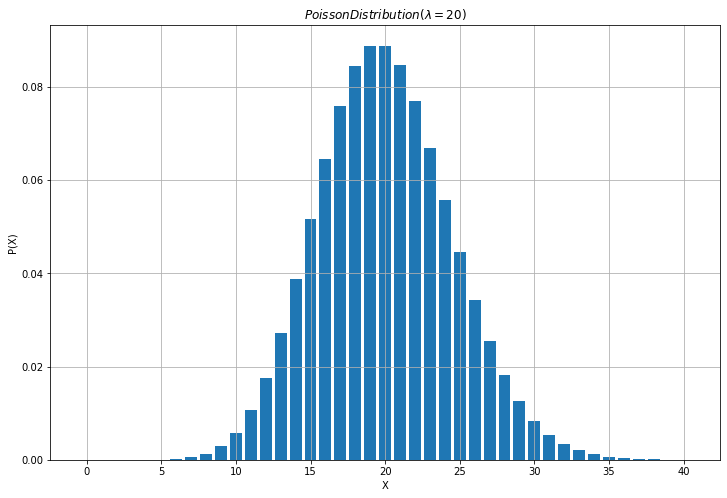

In [ ]:
# pmf method를 통해 확률 질량 함수(pmf; probability mass function) 정의
# 확률 질량 함수 그래프 그리기

plt.figure(figsize=(12, 8))
plt.bar(x, y)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title(r'$Poisson Distribution(\lambda = 20)$')
plt.grid()
plt.show()

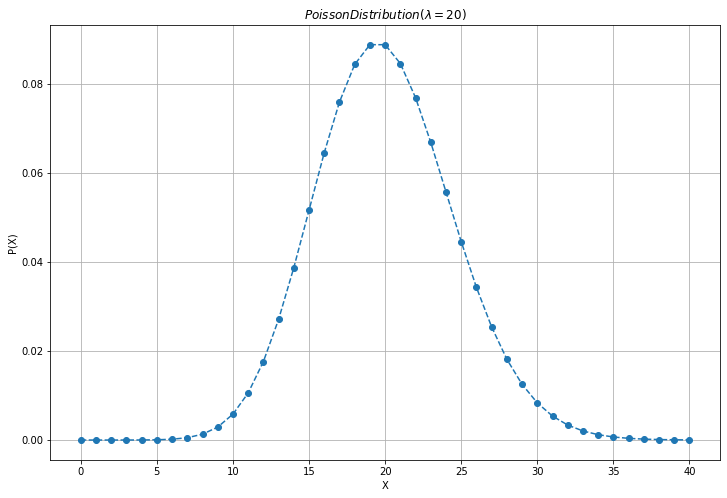

In [ ]:
# 확률 질량 함수 그래프 그리기

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'o--')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title(r'$Poisson Distribution(\lambda = 20)$')
plt.grid()
plt.show()

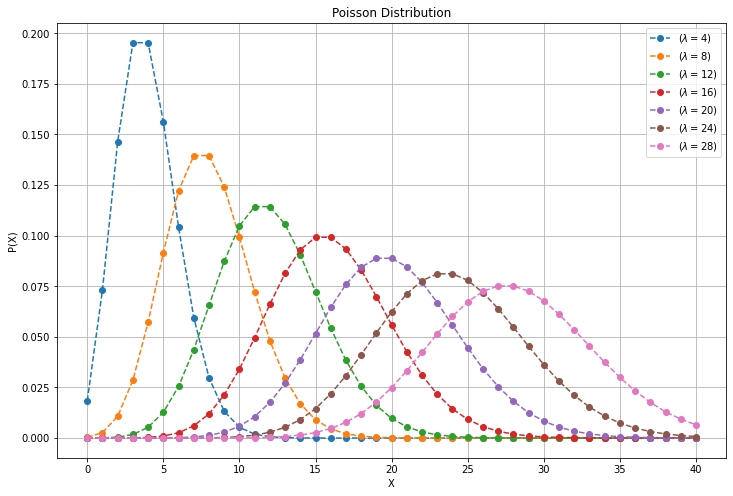

In [ ]:
# 확률 질량 함수 그래프 그리기
# lambda 값 변경해가며, 차이 확인 가능

plt.figure(figsize=(12, 8))

for l in np.arange(4, 30, 4):
    plt.plot(x, sp.stats.poisson(l).pmf(x), 'o--', label=r'$(\lambda =$' + str(l) + ')')
    
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Poisson Distribution')
plt.grid()
plt.legend()
plt.show()